# Musical Composer Prediction - Group 8

Contributors: Bhupal Lambodhar, Aaron Ramirez, Elan Wilkinson

Composers we will be performing prediction for 

1-Bach

2-Beethoven

3-Chopin

4-Mozart

In [4]:
import pretty_midi
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import librosa.display


In [8]:
def get_midi_files(folder_path):
    midi_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.mid'):
                midi_files.append(os.path.join(root, file))
    return midi_files

In [13]:
bach_midi_files = get_midi_files('data/Bach')
beethoven_midi_files = get_midi_files('data/Beethoven')
chopin_midi_files = get_midi_files('data/Chopin')
mozart_midi_files = get_midi_files('data/Mozart')

In [19]:
def Convert_to_midi(files):
    midi_files = []
    for file in files:
        try:
            midi = pretty_midi.PrettyMIDI(file)
            midi_files.append(midi)
        except Exception as e:
            print(f"Error processing file {file}: {e}")
    return midi_files


In [20]:
bach_midis = Convert_to_midi(bach_midi_files)
beethoven_midis = Convert_to_midi(beethoven_midi_files)
chopin_midis = Convert_to_midi(chopin_midi_files)
mozart_midis = Convert_to_midi(mozart_midi_files)

c:\Users\elanw\anaconda3\Lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Error processing file data/Beethoven\Anhang 14-3.mid: Could not decode key with 3 flats and mode 255
Error processing file data/Mozart\Piano Sonatas\Nueva carpeta\K281 Piano Sonata n03 3mov.mid: Could not decode key with 2 flats and mode 2


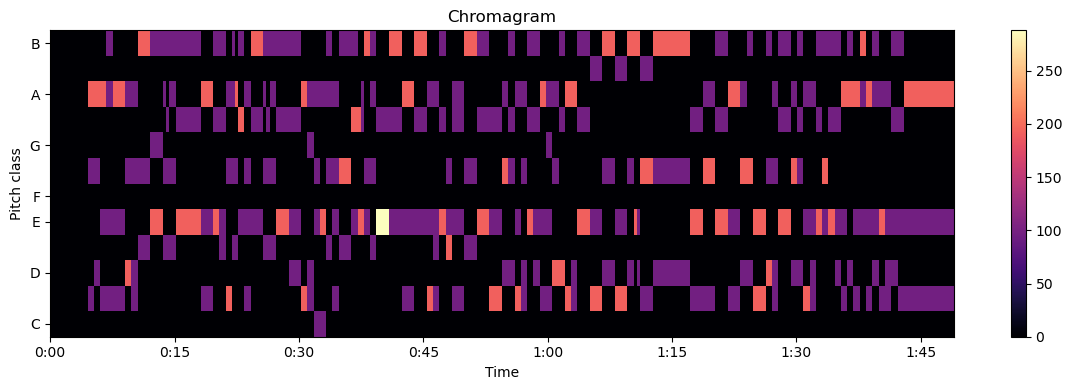

In [26]:
# Get the MIDI data as a sequence of chroma vectors
# then plot these chroma vectors using librosa
# to visualize the chromagram

def get_chroma(midi):
    chroma = midi.get_chroma()
    return chroma

def plot_chroma(chroma):
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chromagram')
    plt.tight_layout()
    plt.show()


# Test using the first midi from the bach_midis
plot_chroma(get_chroma(bach_midis[0]))